Lista wszystkich miast:
1 - Warszawa
2 - Gdynia
3 - Szczecin
4 - Toruń
5 - Lublin
6 - Wrocław
7 - Częstochowa
8 - Rzeszów
9 - Gdańsk
10 - Olsztyn
11 - Lwów
12 - Sosnowiec
13 - Katowice
14 - Kielce
15 - Zabrze
16 - Brno
17 - Bydgoszcz
18 - Gliwice
19 - Królewiec
20 - Kraków
21 - Bytom
22 - Radom
23 - Poznań
24 - Łódź
25 - Praga
26 - Brześć
27 - Grodno
28 - Ostrawa
29 - Bielsko-Biała
Podaj miasto poczatkowe: 
Podaj miasto docelowe: 
Twoja podróż odbędzie się przez miasta:
1 - Lublin
2 - Warszawa - port pośredni
3 - Gdynia
Czasy poszczególnych przejazdów:
('Warszawa', 'Lublin') czas przejazdu: 3.2
('Warszawa', 'Gdynia') czas przejazdu: 3.25


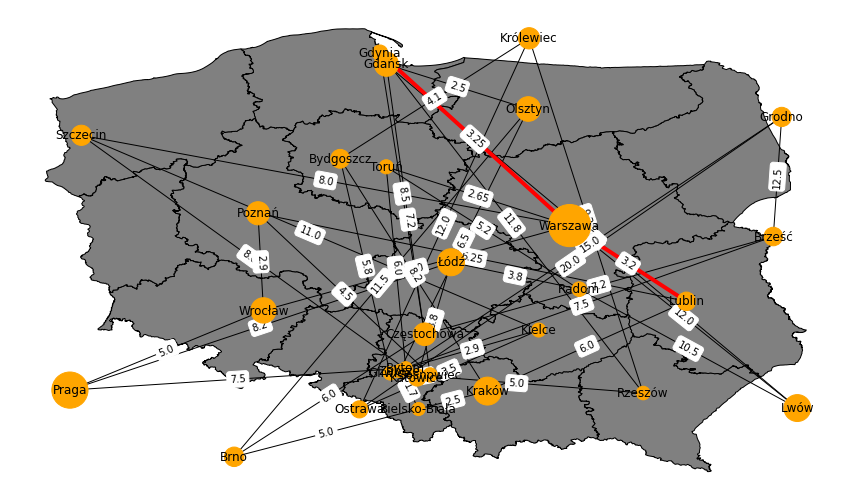

In [78]:
%matplotlib inline
import networkx as nx
import pandas as pnd
import geopandas as gpd

# autor: Sebastian Jaroszek
# grupa: informatyka dualna, tryb niestacjonarny, WSPA Lublin
# semestr: IV
# numer legitymacji: 17386
# data zakończenia prac: 13.06.2020r.

# mapa Polski została pobrana ze strony:
# http://www.gugik.gov.pl/pzgik/dane-bez-oplat/dane-z-panstwowego-rejestru-granic-i-powierzchni-jednostek-podzialow-terytorialnych-kraju-prg

# współrzędne geograficzne dla poszczególnych miast zostały wyszukane i spisane dzięki Google Maps

# lista z liczbą ludności (wielkość miast) została sporządzona bazując na danych z Wikipedii

# lista czasów przejazdu została wyznaczona na podstawie danych z google maps -> transport publiczny -> brane pod uwagę były najkrótsze możliwe przejazdy
# w kilku pozycjach czas przejazdu został wyznaczony na podstawie jazdy samochodem, gdyż w niektórych przypadkach google maps nie udostępnia czasu dojazdu transportem publicznym

# zaczytujemy mapę z plików:
mapa_polski = gpd.read_file('mapa_pl/Wojewodztwa.shp')
mapa_polski.plot(figsize=(15, 17),
                 edgecolors="black",
                 color="grey")
# zaczytujemy dane z plików .csv:
dane_polaczenia = pnd.read_csv('dane/polaczenia.csv')
dane_miasta = pnd.read_csv('dane/miasta.csv')
wyodrebniona_lista_polaczen = list(zip(dane_polaczenia['miasto_start'],
                                       dane_polaczenia['miasto_stop'],
                                       dane_polaczenia['czas']))
# tworzymy graf:
graf = nx.Graph()
graf.add_weighted_edges_from(wyodrebniona_lista_polaczen)

# przygotowujemy dane:
wspolrzedne = list(zip(dane_miasta['wspolrzedna_y'], dane_miasta['wspolrzedna_x']))
nazwy_miast = list(dane_miasta['miasto'])
wielkosc_wezlow = list(dane_miasta['wielkosc'])

# skalujemy powierzchnię braną na podstawie liczby ludności:
for index, value in enumerate(wielkosc_wezlow):
    wielkosc_wezlow[index] = value / 1000

wagi = [n['weight'] for n in graf.edges.values()]
polaczenie_do_wagi = nx.get_edge_attributes(graf, 'weight')
pozycja = {index : value for index, value in zip(nazwy_miast, wspolrzedne)}

nx.draw(graf, pozycja,
        node_shape='o',
        node_size=wielkosc_wezlow,
        node_color='orange',
        arrows=False,
        weight_size=40,
        with_labels=True)
nx.draw_networkx_edge_labels(graf, pozycja, edge_labels=polaczenie_do_wagi)

print ("Lista wszystkich miast:")
for index, value in enumerate(nazwy_miast):
     print(index + 1, "-", value)

print("Podaj miasto poczatkowe: ")
miasto_poczatkowe = input()
print("Podaj miasto docelowe: ")
miasto_docelowe = input()

if not nx.has_path(graf, miasto_poczatkowe, miasto_docelowe):
    # jeżeli nie uda znaleźć się połączenia między wprowadzonymi nazwami miast
    print("W żaden sposób nie da się dotrzeć z " + miasto_poczatkowe + " do " + miasto_docelowe + "!")
else:
    # szukanie najkrótszego połączenia
    sciezka = nx.shortest_path(graf, source=miasto_poczatkowe, target=miasto_docelowe, weight='czas')
    krawedz_sciezki = list(zip(sciezka, sciezka[1:]))

    nx.draw_networkx_edges(graf, pozycja,
                           edge_color='red',
                           width=4,
                           edgelist=krawedz_sciezki)

    print("Twoja podróż odbędzie się przez miasta:")
    for index, value in enumerate(sciezka):
        if 0 < index < len(sciezka) - 1:
            print(index + 1, "-", value, "- port pośredni")
        else:
            print(index + 1, "-", value)

    print("Czasy poszczególnych przejazdów:")
    for index, value in enumerate(krawedz_sciezki):
        for index2, value2 in enumerate(polaczenie_do_wagi):
            if value2 == value or (value[1] == value2[0] and value[0] == value2[1]):
                print(value2, "czas przejazdu:", wagi[index2])